In [2]:
#Soubhik Sen
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import osmnx as ox
import networkx as nx
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

In [3]:
df = pd.read_csv('data/data_stores.csv')
df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [5]:
city = "New Delhi"
df = df[df["City"] == city][["City", "Street Address", "Latitude", "Longitude"]].reset_index(drop = True)
df.head()

,City,Street Address,Latitude,Longitude
0,New Delhi,"Sangam Courtyard, Major Somnath Marg, Sector 9...",28.57,77.17
1,New Delhi,"Domestic Departure, Terminal 1D",28.56,77.12
2,New Delhi,"Ground Floor, Pacific Mall, Subhash Nagar",28.64,77.11
3,New Delhi,"1st Floor, Ambience Mall, Nelson Mandela Marg",28.54,77.16
4,New Delhi,"Ground Floor, Select City Walk Mall",28.53,77.22


In [6]:
df = df.reset_index().rename(columns = {
    "index":"id",
    "Latitude":"y",
    "Longitude":"x"
})
df.head()

,id,City,Street Address,y,x
0,0,New Delhi,"Sangam Courtyard, Major Somnath Marg, Sector 9...",28.57,77.17
1,1,New Delhi,"Domestic Departure, Terminal 1D",28.56,77.12
2,2,New Delhi,"Ground Floor, Pacific Mall, Subhash Nagar",28.64,77.11
3,3,New Delhi,"1st Floor, Ambience Mall, Nelson Mandela Marg",28.54,77.16
4,4,New Delhi,"Ground Floor, Select City Walk Mall",28.53,77.22


In [7]:
print(len(df))

16


In [8]:
data = df.copy()
data["color"]=''
data.loc[data['id']==0, 'color'] = 'red'
data.loc[data['id']!=0, 'color'] = 'black'
start = data[data["id"]==0][["y", "x"]].values[0]
print("Starting Point: ", start)
data.head()

Starting Point:  [28.57 77.17]


,id,City,Street Address,y,x,color
0,0,New Delhi,"Sangam Courtyard, Major Somnath Marg, Sector 9...",28.57,77.17,red
1,1,New Delhi,"Domestic Departure, Terminal 1D",28.56,77.12,black
2,2,New Delhi,"Ground Floor, Pacific Mall, Subhash Nagar",28.64,77.11,black
3,3,New Delhi,"1st Floor, Ambience Mall, Nelson Mandela Marg",28.54,77.16,black
4,4,New Delhi,"Ground Floor, Select City Walk Mall",28.53,77.22,black


In [9]:
map = folium.Map(location=start, titles="cartodbpositron", zoom_start=12)
data.apply(lambda row:
           folium.CircleMarker(
               location=[row["y"], row["x"]],
               color=row["color"], fill = True, radius=5).add_to(map), axis=1)
map

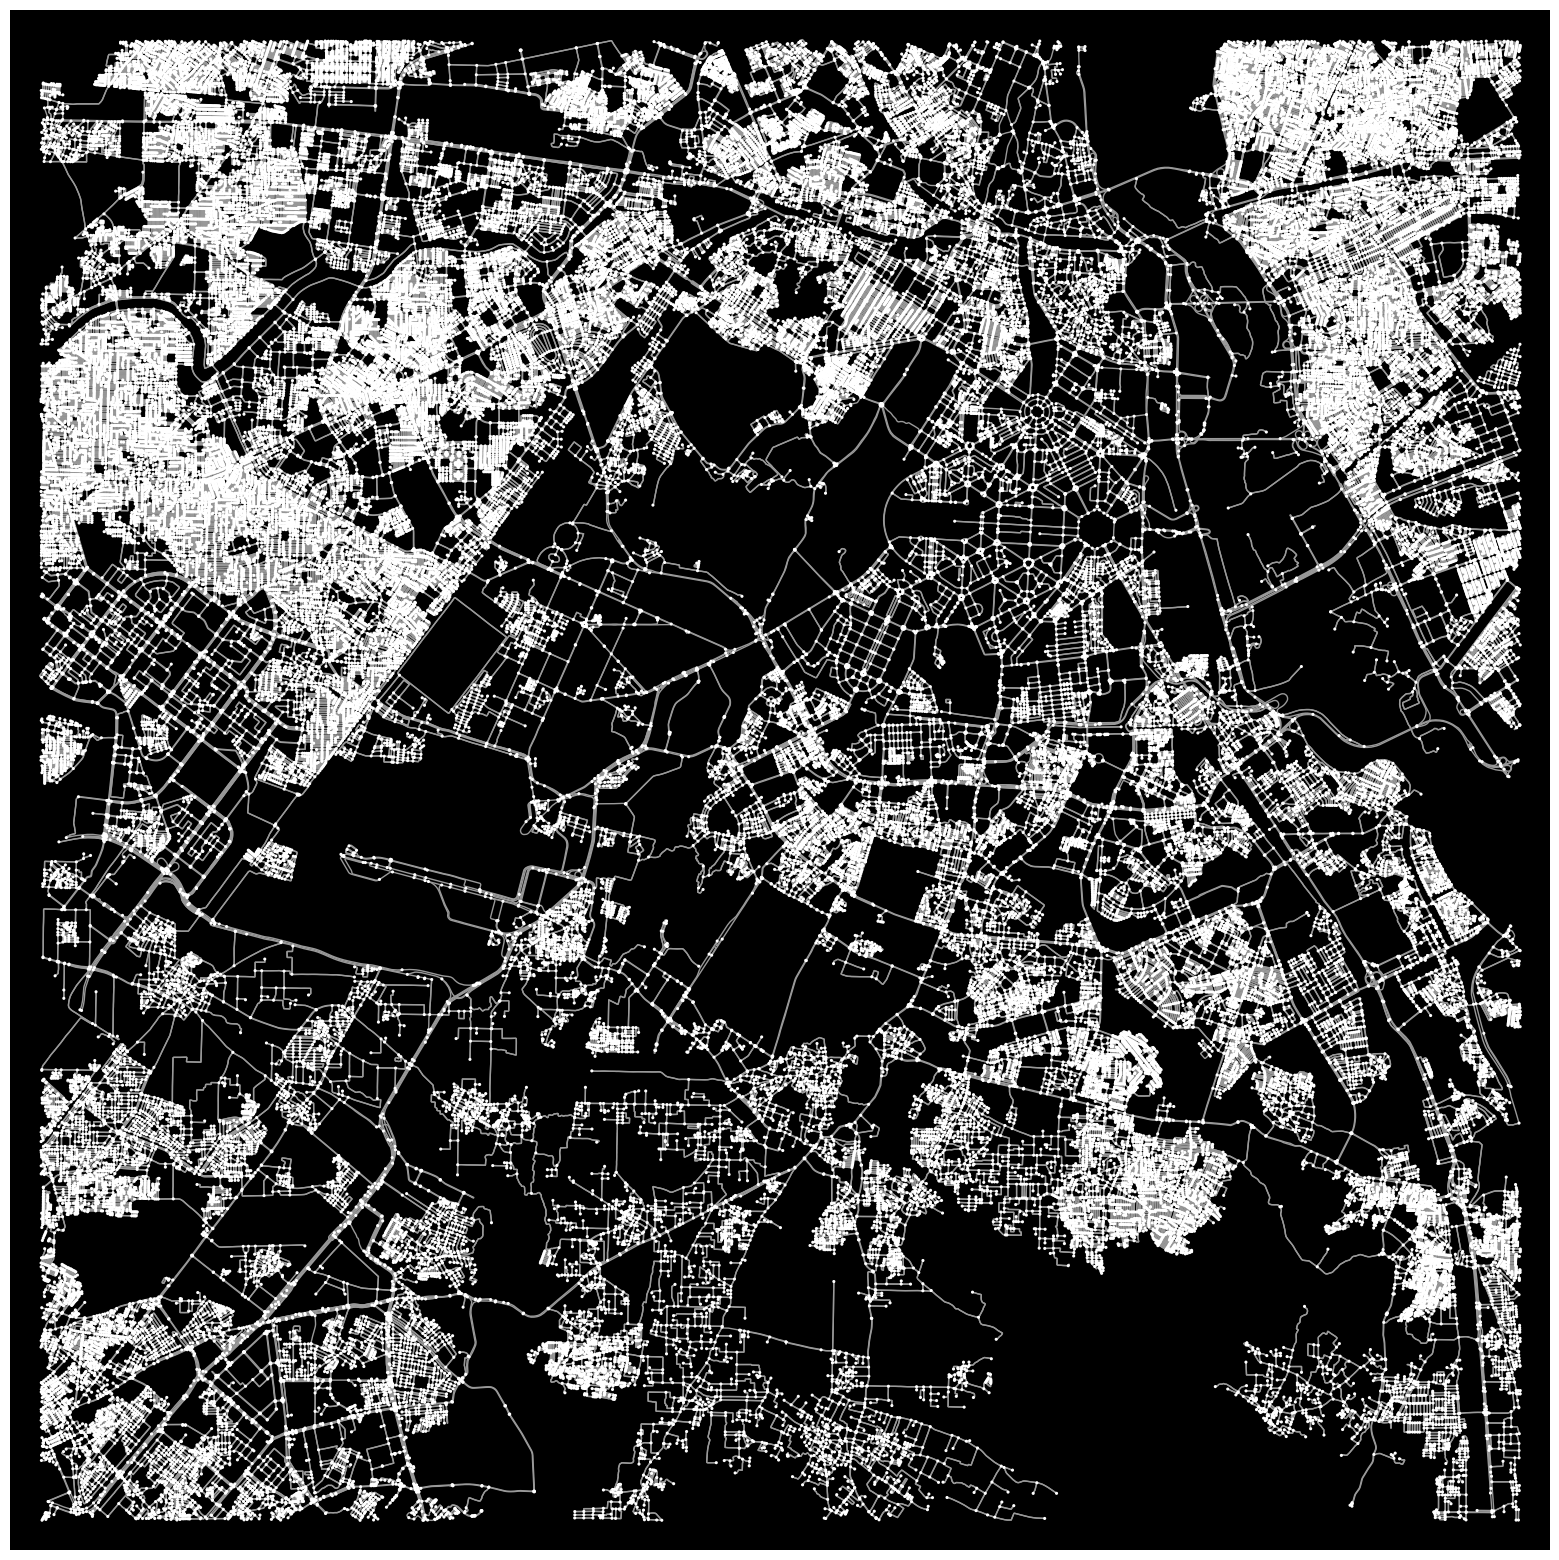

In [19]:
G=ox.graph_from_point(start, dist = 14000, network_type="drive")
G=ox.add_edge_speeds(G)
G=ox.add_edge_travel_times(G)
fig,ax = ox.plot_graph(G, bgcolor="black", node_size=5, node_color="white", figsize=(20, 20))

In [20]:
start_node = ox.distance.nearest_nodes(G, start[1], start[0])
print("nodes: from ", start_node)

nodes: from  5464573100


In [21]:
df["node"] = df[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
df = df.drop_duplicates("node", keep="first")
df.head()

C:\Users\s.sen\AppData\Local\Temp\ipykernel_4132\3568422065.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["node"] = df[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
C:\Users\s.sen\AppData\Local\Temp\ipykernel_4132\3568422065.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["node"] = df[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
C:\Users\s.sen\AppData\Local\Temp\ipykernel_4132\3568422065.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

,id,City,Street Address,y,x,node
0,0,New Delhi,"Sangam Courtyard, Major Somnath Marg, Sector 9...",28.57,77.17,5464573100
1,1,New Delhi,"Domestic Departure, Terminal 1D",28.56,77.12,6541979906
2,2,New Delhi,"Ground Floor, Pacific Mall, Subhash Nagar",28.64,77.11,9699816496
3,3,New Delhi,"1st Floor, Ambience Mall, Nelson Mandela Marg",28.54,77.16,2009014674
4,4,New Delhi,"Ground Floor, Select City Walk Mall",28.53,77.22,6438793178


In [22]:
df

,id,City,Street Address,y,x,node
0,0,New Delhi,"Sangam Courtyard, Major Somnath Marg, Sector 9...",28.57,77.17,5464573100
1,1,New Delhi,"Domestic Departure, Terminal 1D",28.56,77.12,6541979906
2,2,New Delhi,"Ground Floor, Pacific Mall, Subhash Nagar",28.64,77.11,9699816496
3,3,New Delhi,"1st Floor, Ambience Mall, Nelson Mandela Marg",28.54,77.16,2009014674
4,4,New Delhi,"Ground Floor, Select City Walk Mall",28.53,77.22,6438793178
5,5,New Delhi,"Lower Ground Floor, Nehru Place Metro Station",28.55,77.25,910665179
6,6,New Delhi,"Hamilton House, A Block, Inner Circle",28.63,77.22,5681450581
9,9,New Delhi,"Ground Floor, HB Twin Towers, Netaji Subhash P...",28.69,77.15,1826038884
10,10,New Delhi,"M Block Market, Greater Kailash 1",28.55,77.24,939270551
11,11,New Delhi,"International Departure, Near Gate 15, Termina...",28.56,77.10,4230117891


In [23]:
def f(a, b):
    try:
        d = nx.shortest_path_length(G, source=a, target=b, method='dijkstra', weight='travel_time')
    except:
        d=np.nan
    return d

In [24]:
distance_matrix = np.asarray([[f(a, b) for b in df["node"].tolist()] for a in df["node"].tolist()])
distance_matrix = pd.DataFrame(distance_matrix, columns=df["node"].values, index=df["node"].values)
distance_matrix

,5464573100,6541979906,9699816496,2009014674,6438793178,910665179,5681450581,1826038884,939270551,4230117891,560224224,7640317808,1411138852
5464573100,0.000000,503.495542,1055.380204,382.630284,719.444177,885.149397,783.415311,1402.848587,890.446486,779.759839,548.670090,944.939707,1184.659686
6541979906,605.758769,0.000000,1167.871761,816.884685,1199.605385,1373.982820,1263.823143,1573.663902,1409.298966,732.618869,1028.831298,1425.100916,1501.731523
9699816496,1060.404373,1229.010412,0.000000,1413.618889,1700.436941,1700.774964,1091.989094,670.849600,1706.072052,1505.274709,1524.534822,1920.804440,946.884151
2009014674,573.136508,818.312228,1543.890031,0.000000,835.569191,1083.068648,1271.925138,1891.358414,1118.384794,731.406070,737.917126,1134.186744,1673.169514
6438793178,746.910277,1070.189381,1699.104568,721.530609,0.000000,366.936465,1024.389129,1947.139381,402.252611,1346.453678,401.312074,418.054561,1543.074862
910665179,803.201512,1238.638456,1688.819756,943.868631,435.206178,0.000000,856.179454,1853.543265,116.438410,1514.902752,569.761148,292.704013,1374.865187
5681450581,770.606564,979.116460,1036.503639,1121.002450,1026.023922,899.870049,0.000000,1040.709959,905.167137,1255.380757,871.762900,1152.200786,518.685733
1826038884,1431.968061,1610.875727,694.963525,1785.182578,1983.605491,1899.193467,1096.294133,0.000000,1904.490555,1887.140023,1829.344469,2151.524203,682.877402
939270551,787.547576,1248.876152,1673.165820,977.326384,498.415073,141.884864,840.525519,1837.889329,0.000000,1525.140449,603.218901,415.530676,1359.211251
4230117891,793.283021,512.435559,1428.923032,649.847713,1265.766970,1561.507072,1451.347396,1834.715173,1596.823218,0.000000,1216.355551,1612.625168,1689.255775
